# EDA for CEFR Levels

In [12]:
import numpy as np
import string
import cloudpickle as pickle
import re
import pandas as pd
import itertools
import bcolz
import os
from keras.utils.np_utils import to_categorical
from keras.utils.data_utils import get_file
from keras.preprocessing.sequence import pad_sequences

This path can be adjusted as needed; I just dumped the 'sentences' folder from the unzipped file from Giuseppe and put it in the /data directory.

In [13]:
data_path = 'data/sentences/'

In [14]:
%matplotlib inline

In [16]:
cefr_levels = ['a1','a2','b1','b2']

## Sort data into train, valid, and test sets

In [17]:
%pwd

'/Users/Anatoly/GitHub/ML-Co-learning-team/CEFR'

### Load and process data

In [21]:
import spacy
nlp = spacy.load('en')



In [22]:
base_file = ' sentences.txt'

docs = [];
for l in range(len(cefr_levels)):
    text = open(data_path + cefr_levels[l] + base_file).read()
    docs.append(nlp(text))



In [83]:
X = []
y = []
colors = ['red','green','blue','purple']

for i,doc in enumerate(docs):
    for s in doc.sents:
        X.append(s.vector)
        y.append(colors[i])

In [88]:
from sklearn.manifold import TSNE
import numpy as np

ishuffle = np.random.permutation(len(X))
Xn = np.array(X)
yn = np.array(y)


Xshort = Xn[(ishuffle[:2000], Ellipsis)]
yshort = yn[(ishuffle[:2000], Ellipsis)]
# seems very sensitive to random_state , algorith unstable at this time
model = TSNE(n_components=2, random_state=42)
np.set_printoptions(suppress=True)

# doc.vector returns average vector of all tokens, not a good metric, but should work for first try
mapped = model.fit_transform(  Xshort ) 

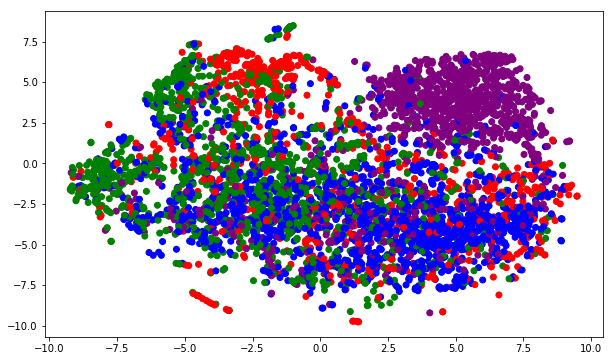

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(mapped[:,0],mapped[:,1],c=yshort)

#for label, x, y in zip(df.index, mapped[:,0],mapped[:,1]):
#    plt.annotate(
#        label,
#        xy=(x, y), xytext=(-1, 1),
#        textcoords='offset points', ha='right', va='bottom',
      #  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      #  arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
#        )